# Property Animator

This note show Python code that will animate the results of the PNS solver code. I added code to the solver that create a simple text output that records the axial location, then all the calculated properties for eack grid point. The resulting file is named **solution.dat** and I have copied that file into the **assets** folder in the documentation for this demonstration.

To get started, we need to tell *Jupyterlab* that we wanto to include graphics output created using **matplotlib**:

In [1]:
%matplotlib inline

Next, we set the property number we wish to display. Total Pressure is number 7).

In [2]:
displayProp = 7

The next block imports libraries needed in the code:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
here = !pwd
here

['/Users/rblack/_dev/CFD-talk/book']

We will be running *Python* directly in thie notebook. Since I will be importing modules in this directory, I need to set up the **path** Python will use to search for packages:


In [5]:
import sys
sys.path.insert(1, '/Users/rblack/_dev/CFD-talk/Python')

Next, we create a list of property names. These will be used to annotate the graphics display.

In [6]:
propNames = [
    'Eta',
    'Rho', 
    'Axial Velocity', 
    'Radial Velocity', 
    'Static Pressure', 
    'Static Temperature', 
    'Mach Number', 
    'Total Pressure'
]

Now, we can import the animation code. (Not shown here but included in the letcure repository on GitHub.

We run code that loads data from the solution data file:

In [7]:
from PropertyAnimator import PropertyAnimator

animator = PropertyAnimator('assets/solution.dat')
stations, properties, pmax, pmin = animator.load(displayProp)
propName = propNames[displayProp]

After running this block of code, we have theses data:

- stations - a list of axial locations where we performed a calculation
- properties - a 2D block od property data.
- pmax - the largest property value found in the data block.
- pmin - the smallest property value found

We need to figure out the bounds to use on the graph we will display. The **PropertyAnimator* code handles that and returns the max and min data **X** values. The **Y** range is simply the number of points in the grid. All data is nondimensionalized in this study.

In [8]:
# set figure x bounds
xRange = pmax-pmin
print(pmax,pmin,xRange)

3.23037 0.01906 3.21131


Just so we can be sure we have loaded the data correctly, let's look at the first iteration output for total pressure.

In [9]:
print(properties[1,])

[1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.      1.      1.      1.      1.      1.      1.      1.
 1.      1.0127  1.11219 0.03037]


Next, we establish integers that capture the range of this plot. These values will be used to set the width of the display, scaling for each selected property.

In [11]:
xl = math.floor(pmin)
xh = math.ceil(pmax)
(xl,xh)

(0, 4)

The next code block creates the basic grid we will use for the animation. In the running notebook (not the web page) you will see the grid before we add the actual data display.

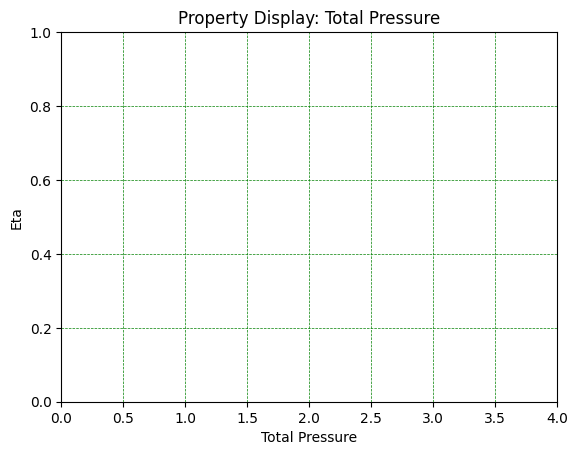

In [12]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# the test animation will display the selected property 
# curves Values run from 
ax.set_xlim((xl, xh))
ax.set_ylim((0, 1))
plt.title("Property Display: %s" % propName)
plt.xlabel(propName)
plt.ylabel("Eta")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
line, = ax.plot([], [], lw=2)

We initialize a pair of lists which will end up holding the **(X,Y)** points to plot. This is done in the **init** routine. The animation is created by copying data from the solution file for each iteration of the code into this pair of lists. We will not actually do that copy work. Instead **matplotlib** will call the **fetchDataLine** routine, passing in an index number to select a column of data. This is called as needed to create the animation.

In [13]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [14]:
def fetchDataLine(y,i):
    '''generate radial data line for frame numbed i'''
    data = properties[i,]
    return data
    

Here is the routine we need to create to fetch a line of data for display:

In [15]:
# animation function. This is called sequentially
def animate(i):
    y = np.linspace(1, 0, 31)
    x = fetchDataLine(y,i)
    line.set_data(x, y)
    return (line,)
    

Now the magic happens. The code below tells **matplotlib** where our grid object (where the figure is created), the name of the initialization routine, and the name of the data fetch routine. We also tell it how many frames we want and how long to wait between frames to create the next one. That is what makes things move!

In [16]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=481, interval=50, blit=True)

the final block makes the animation show up in this *Jupyterlab* notebook page - so you see the result right here!

In [17]:
HTML(anim.to_html5_video())

Click on the "play" icon to see the result. If you look closely toward the end of this animation, you see the march down the body. It is pretty obvious that the solution has problems in that region, something I am still working on. I probably have an error in the code I need to track down since this issue was not apparent in the original code.

It is also obvious that the solver needs more data points near the shock. However, since the first point away from the wall must be supersonic, something other than a linear distribution of points is needed. With the solver code in Python, this is easy to experiment with.

Jupyterlab is a powerful tool you can use in your research. If I add code to my Fortran (or C++) version of this code, the output from each can be viewed using this animation code. 

Boy, that beats drawing lines manually on graph paper - something we did back before the Earth had cooled!